In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
upload=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [ ]:
crime = pd.read_csv('crime_data.csv')

In [ ]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime = crime.rename({'Unnamed: 0' : 'Places'}, axis = 1)
crime.head()

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime_2=pd.get_dummies(crime,columns=['Places'])
crime_2.head()

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_South Dakota,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Places    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Murder                 50 non-null     float64
 1   Assault                50 non-null     int64  
 2   UrbanPop               50 non-null     int64  
 3   Rape                   50 non-null     float64
 4   Places_Alabama         50 non-null     uint8  
 5   Places_Alaska          50 non-null     uint8  
 6   Places_Arizona         50 non-null     uint8  
 7   Places_Arkansas        50 non-null     uint8  
 8   Places_California      50 non-null     uint8  
 9   Places_Colorado        50 non-null     uint8  
 10  Places_Connecticut     50 non-null     uint8  
 11  Places_Delaware        50 non-null     uint8  
 12  Places_Florida         50 non-null     uint8  
 13  Places_Georgia         50 non-null     uint8  
 14  Places_Hawaii          50 non-null     uint8  
 15  Places_I

##**NORMALIZATION**

In [ ]:
def minmax_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [ ]:
df_norm = minmax_func(crime_2)
df_norm.head()

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_South Dakota,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming
0,0.746988,0.654110,0.440678,0.359173,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.554217,0.746575,0.271186,0.961240,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.481928,0.496575,0.305085,0.315245,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493976,0.791096,1.000000,0.860465,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


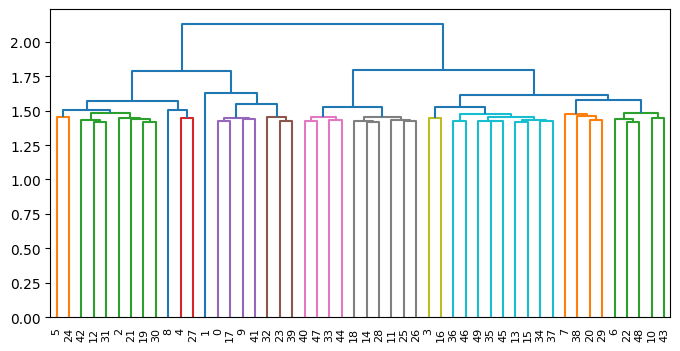

In [ ]:
plt.figure(figsize=(8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

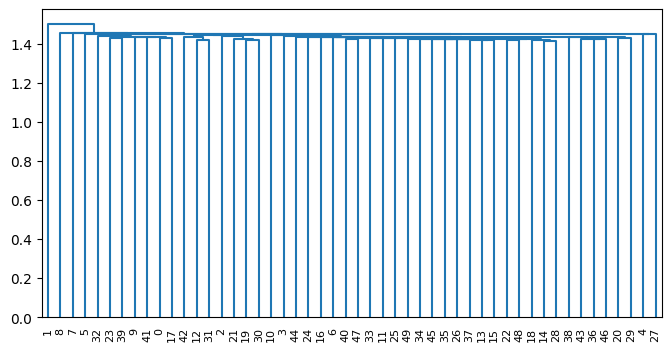

In [ ]:
plt.figure(figsize=(8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

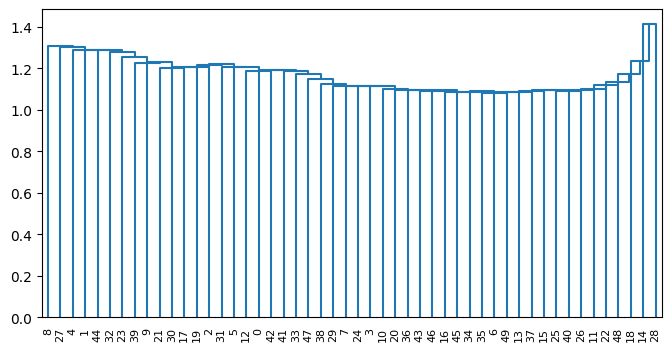

In [ ]:
plt.figure(figsize=(8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

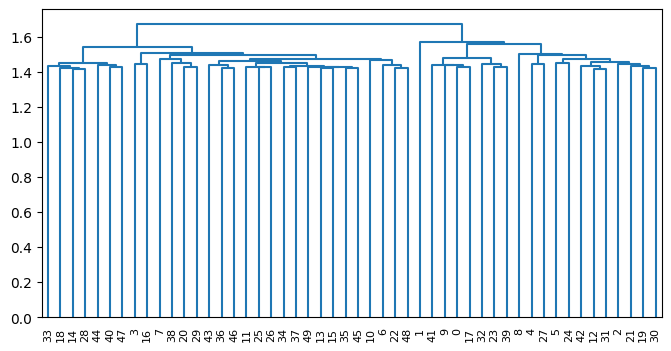

In [ ]:
plt.figure(figsize=(8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

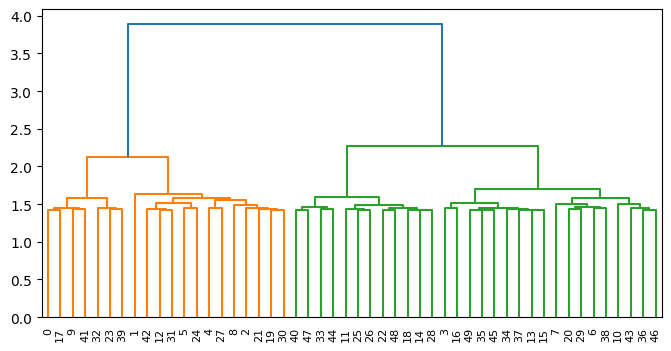

In [ ]:
plt.figure(figsize=(8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [ ]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
hclusters = hclusters.fit_predict(df_norm)
hclusters

array([3, 0, 0, 4, 0, 0, 1, 1, 0, 3, 1, 2, 0, 4, 2, 4, 4, 3, 2, 0, 1, 0,
       2, 3, 0, 2, 2, 0, 2, 1, 0, 0, 3, 2, 4, 4, 1, 4, 1, 3, 2, 3, 0, 1,
       2, 4, 1, 2, 2, 4])

In [ ]:
crime['h_cluster_id'] = hclusters
crime.head()

,Places,Murder,Assault,UrbanPop,Rape,h_cluster_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,0


In [ ]:
len(crime[crime['h_cluster_id']==0])

13

In [ ]:
len(crime[crime['h_cluster_id']==1])

9

In [ ]:
len(crime[crime['h_cluster_id']==2])

12

In [ ]:
len(crime[crime['h_cluster_id']==3])

7

In [ ]:
len(crime[crime['h_cluster_id']==4])

9

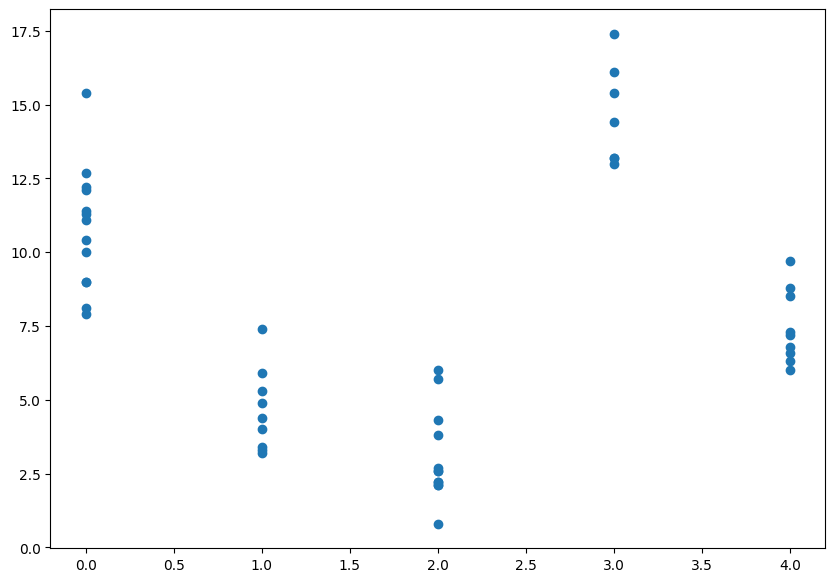

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(crime['h_cluster_id'],crime['Murder'])

##**KMEANS**

In [ ]:
def norm_func(i):
  x=(i-i.mean())/(i.std())
  return(x)

In [ ]:
x = norm_func(crime_2)
x.head()

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_South Dakota,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming
0,1.242564,0.782839,-0.520907,-0.003416,6.929646,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
1,0.507862,1.106823,-1.211764,2.484203,-0.141421,6.929646,-0.141421,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
2,0.071633,1.478803,0.998980,1.042878,-0.141421,-0.141421,6.929646,-0.141421,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
3,0.232349,0.230868,-1.073593,-0.184917,-0.141421,-0.141421,-0.141421,6.929646,-0.141421,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421
4,0.278268,1.262814,1.758923,2.067820,-0.141421,-0.141421,-0.141421,-0.141421,6.929646,-0.141421,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421


##**ELBOW CHART**

[2646.0000000000005, 2505.5831719890994, 2429.3905341108075, 2363.5390154288266, 2303.8385231650273, 2247.151401523089, 2192.5858351651514, 2137.2173324379833, 2085.186019210724, 2033.5225263143066]


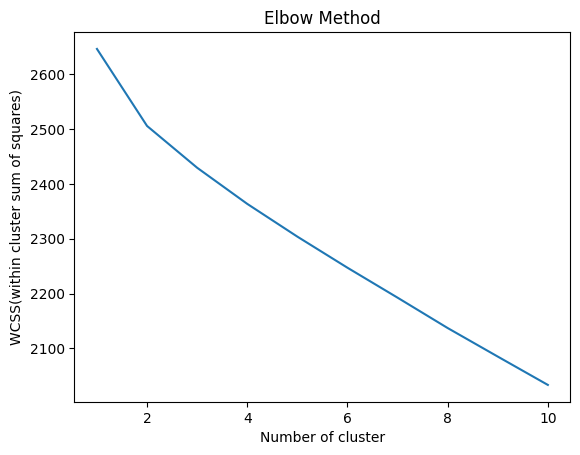

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#WCSS(within cluster sum of square)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS(within cluster sum of squares)')
plt.show()

In [ ]:
k_mean_clust = KMeans(4, random_state=0)
k_mean_clust.fit(x)

KMeans(n_clusters=4, random_state=0)

In [ ]:
k_mean_clust.labels_

array([3, 1, 1, 0, 1, 1, 2, 0, 1, 3, 0, 0, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 0, 0, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
crime['Kmean_clust_id'] = k_mean_clust.labels_
crime.head(10)

,Places,Murder,Assault,UrbanPop,Rape,h_cluster_id,Kmean_clust_id
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,4,0
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,1,2
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,3,3


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,k_mean_clust.labels_,metric='euclidean')

0.013426997093225803

##**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db_crime = pd.read_csv('crime_data.csv')

In [ ]:
db_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
del db_crime['Unnamed: 0']
db_crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(db_crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4,metric='euclidean')
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Adding clusters to dataset
crime['dbscan_id']=dbscan.labels_
crime.head(10)

,Places,Murder,Assault,UrbanPop,Rape,h_cluster_id,Kmean_clust_id,dbscan_id
0,Alabama,13.2,236,58,21.2,3,3,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,-1
3,Arkansas,8.8,190,50,19.5,4,0,-1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,-1
6,Connecticut,3.3,110,77,11.1,1,2,1
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,3,3,-1


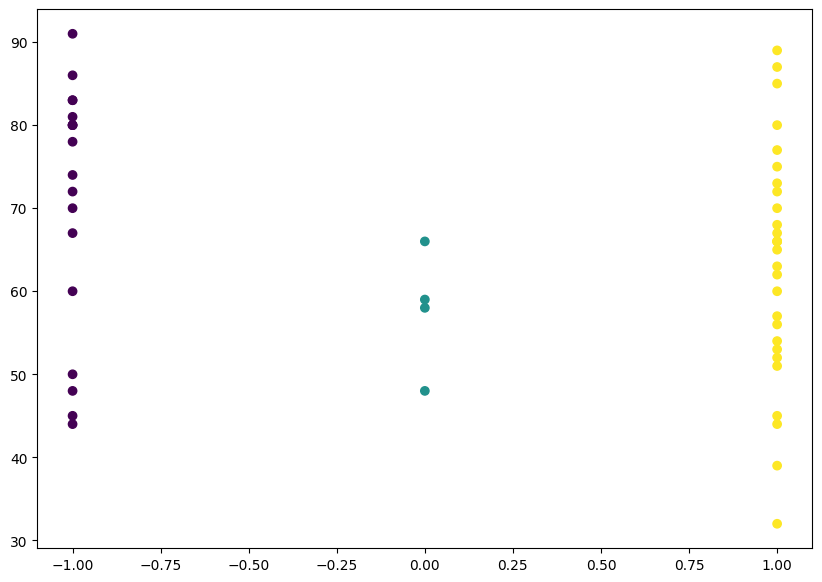

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(crime['dbscan_id'],crime['UrbanPop'], c=dbscan.labels_)

In [ ]:
(len(crime[crime['dbscan_id']==-1])/len(crime))*100

36.0

In [ ]:
from sklearn.metrics import silhouette_score
X=silhouette_score(x,dbscan.labels_)
X

0.013113830335277361

### **Clustering [DBSCAN , KMEANS , AGGLOMERATIVE]**

In [ ]:
crime.iloc[:,[-1,-2,-3]]

,dbscan_id,Kmean_clust_id,h_cluster_id
0,0,3,3
1,-1,1,0
2,-1,1,0
3,-1,0,4
4,-1,1,0
5,-1,1,0
6,1,2,1
7,-1,0,1
8,-1,1,0
9,-1,3,3
